Angewandte Mathematik

Aufgabenblatt 6

In [2]:
# Import packages
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

![image.png](img/aufgabenblatt_06_00.png)

In [3]:
# Define function
x1, x2 = sp.symbols('x1 x2')
f = x1**2 - x1 + x2**3 - 2*x2

# Make function usable
f_func = sp.lambdify((x1, x2), f, 'numpy')

In [4]:
def getPartialDerivation(f):
  derivations = []
  
    # Sort the symbols
  sorted_symbols = sorted(f.free_symbols, key=lambda sym: sym.name)
  
  for var in sorted_symbols:
    partial_derivation = sp.diff(f, var)
    partial_derivation_usable = sp.lambdify((var), partial_derivation, 'numpy')
    derivations.append({
      'function': partial_derivation,
      'usable':partial_derivation_usable
      })
  
  return derivations

def grad_f(k_n, f_grad_funcs):
  fd = []

  for i, f in enumerate(f_grad_funcs):
      fd_value = f['usable'](k_n[i]) 
      fd.append(fd_value)

  return np.array(fd)

def gdm(f, k_init, epsilon, n, p=False):
  points = []
  k_n = k_init
  partial_derivation = getPartialDerivation(f)

  for k in range(n):
    k_n = k_n - epsilon * grad_f(k_n, partial_derivation)
    points.append(k_n)
    
    if p:
      print(f'Iteration: {k:2d} | x1 = {k_n[0]:.5f}, x2 = {k_n[1]:.5f}')
    
  return [np.array(points), partial_derivation]

![image.png](img/aufgabenblatt_06_01.png)


In [5]:
# Starting variables
epsilon = 0.1
n = 10
k_init = np.array([1, 1])

# Get partial derivation
points, x = gdm(f, k_init, epsilon, n, True)

Iteration:  0 | x1 = 0.90000, x2 = 0.90000
Iteration:  1 | x1 = 0.82000, x2 = 0.85700
Iteration:  2 | x1 = 0.75600, x2 = 0.83667
Iteration:  3 | x1 = 0.70480, x2 = 0.82666
Iteration:  4 | x1 = 0.66384, x2 = 0.82165
Iteration:  5 | x1 = 0.63107, x2 = 0.81912
Iteration:  6 | x1 = 0.60486, x2 = 0.81783
Iteration:  7 | x1 = 0.58389, x2 = 0.81718
Iteration:  8 | x1 = 0.56711, x2 = 0.81684
Iteration:  9 | x1 = 0.55369, x2 = 0.81667


![image.png](img/aufgabenblatt_06_02.png)

In [6]:
def drawPoints(points):
  plt.figure(figsize=(8, 6))
  plt.title("Visualisierung der Gradientenabstiegs-Punkte")
  plt.xlabel("$x_1$-Koordinate")
  plt.ylabel("$x_2$-Koordinate")
  plt.grid(True)
  
  plt.scatter(points[:, 0], points[:, 1], c='blue', label="Punkte ($x^{(k)}$)")
  plt.legend()
  plt.show()

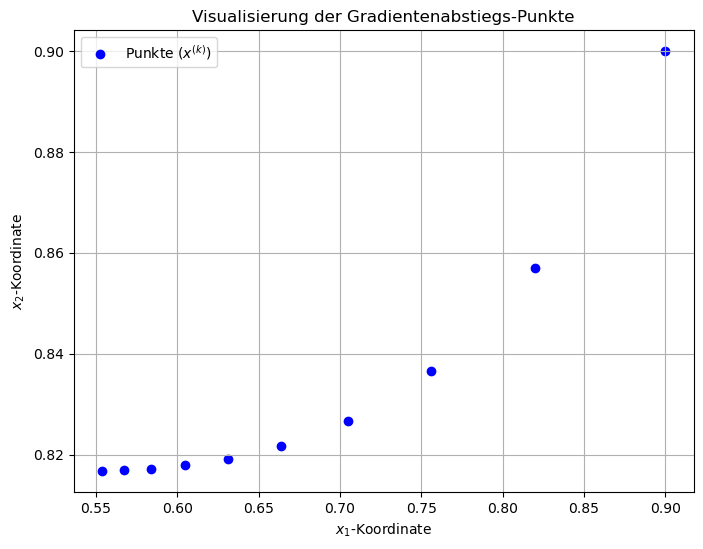

In [7]:
drawPoints(points)

![image.png](img/aufgabenblatt_06_03.png)

Iteration:  0 | x1 = 0.90000, x2 = 0.90000
Iteration:  1 | x1 = 0.82000, x2 = 0.85700
Iteration:  2 | x1 = 0.75600, x2 = 0.83667
Iteration:  3 | x1 = 0.70480, x2 = 0.82666
Iteration:  4 | x1 = 0.66384, x2 = 0.82165
Iteration:  5 | x1 = 0.63107, x2 = 0.81912
Iteration:  6 | x1 = 0.60486, x2 = 0.81783
Iteration:  7 | x1 = 0.58389, x2 = 0.81718
Iteration:  8 | x1 = 0.56711, x2 = 0.81684
Iteration:  9 | x1 = 0.55369, x2 = 0.81667
Iteration: 10 | x1 = 0.54295, x2 = 0.81659
Iteration: 11 | x1 = 0.53436, x2 = 0.81654
Iteration: 12 | x1 = 0.52749, x2 = 0.81652
Iteration: 13 | x1 = 0.52199, x2 = 0.81651
Iteration: 14 | x1 = 0.51759, x2 = 0.81650
Iteration: 15 | x1 = 0.51407, x2 = 0.81650
Iteration: 16 | x1 = 0.51126, x2 = 0.81650
Iteration: 17 | x1 = 0.50901, x2 = 0.81650
Iteration: 18 | x1 = 0.50721, x2 = 0.81650
Iteration: 19 | x1 = 0.50576, x2 = 0.81650


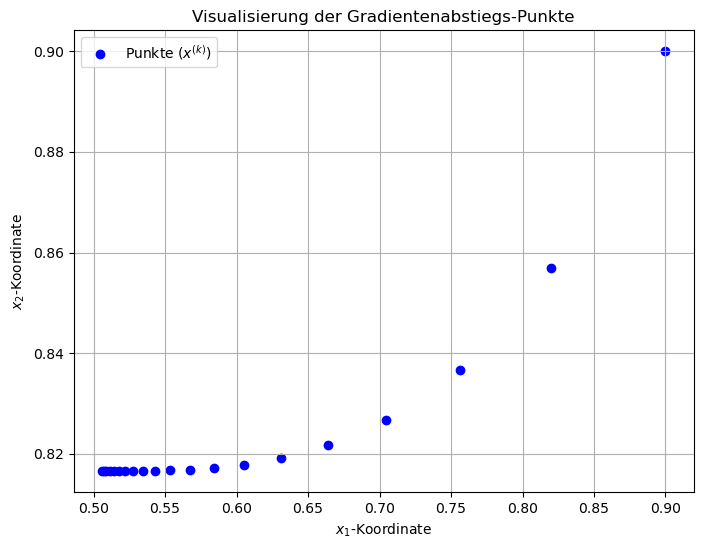

In [8]:
n = 20
points, x = gdm(f, k_init, epsilon, n, True)
drawPoints(points)

![image.png](img/aufgabenblatt_06_04.png)

In [9]:
# sp.diff(partial_derivation[0]['function'])
# sp.diff(partial_derivation[1]['function'])

hessian_matrix = sp.hessian(f, (x1, x2))
hessian_func = sp.lambdify((x1, x2), hessian_matrix, 'numpy')
eigenvalues = np.linalg.eigvals(hessian_func(*k_init))

hessian_matrix, eigenvalues

(Matrix([
 [2,    0],
 [0, 6*x2]]),
 array([2., 6.]))

![image.png](img/aufgabenblatt_06_05.png)

Iteration:  0 | x1 = 0.80000, x2 = 0.80000
Iteration:  1 | x1 = 0.68000, x2 = 0.81600
Iteration:  2 | x1 = 0.60800, x2 = 0.81649
Iteration:  3 | x1 = 0.56480, x2 = 0.81650
Iteration:  4 | x1 = 0.53888, x2 = 0.81650
Iteration:  5 | x1 = 0.52333, x2 = 0.81650
Iteration:  6 | x1 = 0.51400, x2 = 0.81650
Iteration:  7 | x1 = 0.50840, x2 = 0.81650
Iteration:  8 | x1 = 0.50504, x2 = 0.81650
Iteration:  9 | x1 = 0.50302, x2 = 0.81650


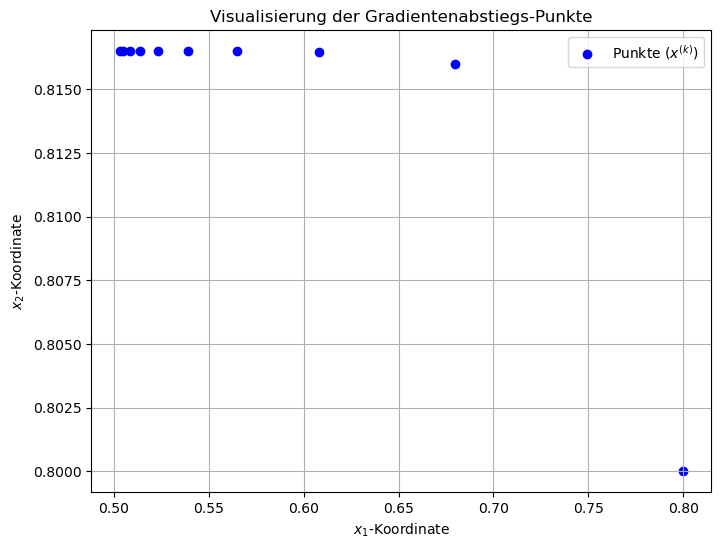

In [10]:
n = 10
epsilon = 0.2
points, x = gdm(f, k_init, epsilon, n, True)
drawPoints(points)


Iteration:  0 | x1 = 0.70000, x2 = 0.70000
Iteration:  1 | x1 = 0.58000, x2 = 0.85900
Iteration:  2 | x1 = 0.53200, x2 = 0.79491
Iteration:  3 | x1 = 0.51280, x2 = 0.82622
Iteration:  4 | x1 = 0.50512, x2 = 0.81185
Iteration:  5 | x1 = 0.50205, x2 = 0.81866
Iteration:  6 | x1 = 0.50082, x2 = 0.81548
Iteration:  7 | x1 = 0.50033, x2 = 0.81698
Iteration:  8 | x1 = 0.50013, x2 = 0.81627
Iteration:  9 | x1 = 0.50005, x2 = 0.81660


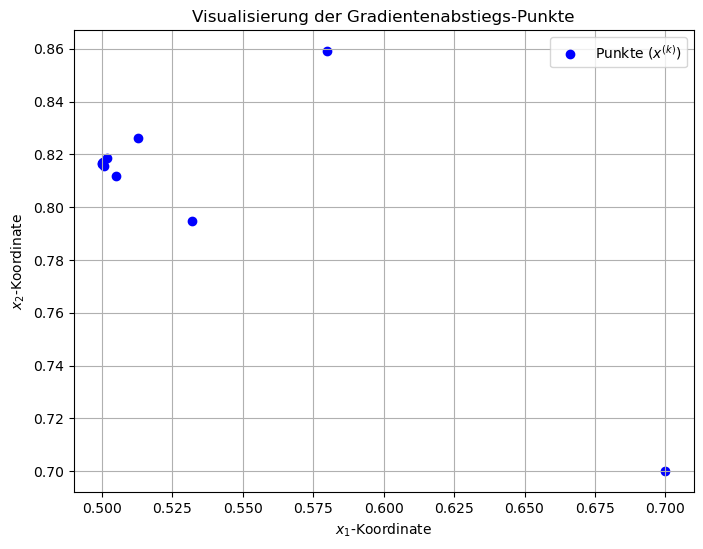

In [11]:
epsilon = 0.3
points, x = gdm(f, k_init, epsilon, n, True)
drawPoints(points)


Iteration:  0 | x1 = 0.60000, x2 = 0.60000
Iteration:  1 | x1 = 0.52000, x2 = 0.96800
Iteration:  2 | x1 = 0.50400, x2 = 0.64357
Iteration:  3 | x1 = 0.50080, x2 = 0.94655
Iteration:  4 | x1 = 0.50016, x2 = 0.67140
Iteration:  5 | x1 = 0.50003, x2 = 0.93047
Iteration:  6 | x1 = 0.50001, x2 = 0.69155
Iteration:  7 | x1 = 0.50000, x2 = 0.91766
Iteration:  8 | x1 = 0.50000, x2 = 0.70714
Iteration:  9 | x1 = 0.50000, x2 = 0.90709


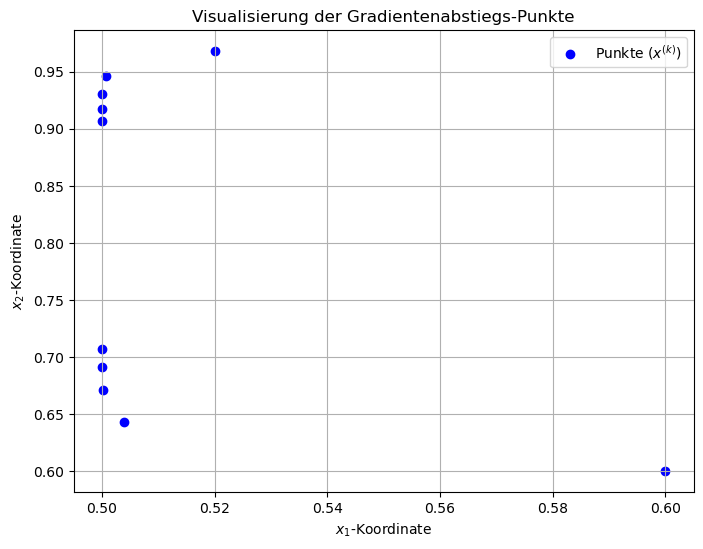

In [12]:
epsilon = 0.4
points, x = gdm(f, k_init, epsilon, n, True)
drawPoints(points)


![image.png](img/aufgabenblatt_06_06.png)

In [13]:
def getEuclideanDistance(manuel, method):
  return np.sqrt((method[0] - float(manuel[0]))**2 + (method[1] - float(manuel[1]))**2)


In [14]:
# Calculate with GDM 
n = 10
points, partial_derivation = gdm(f, k_init, epsilon, n)

# Calculate critical points manualy
x1_critical = sp.solve(partial_derivation[0]['function']) 
x2_critical = sp.solve(partial_derivation[1]['function'])

print(f'x1_critical: {x1_critical} | x2_critical: {x2_critical}')

# Get value 
x1_critical_value = x1_critical[0].evalf()
x2_critical_value = x2_critical[1].evalf()

euclidean_distance = getEuclideanDistance([x1_critical_value, x2_critical_value], points[-1])

print(f'Die Euclidische distanz beträgt: {euclidean_distance}')

x1_critical: [1/2] | x2_critical: [-sqrt(6)/3, sqrt(6)/3]
Die Euclidische distanz beträgt: 0.09058949527036257


![image.png](img/aufgabenblatt_06_07.png)

In [15]:
def newton_method(f, k_init, n, p=False):
  points = []
  k_n = k_init
  partial_derivation = getPartialDerivation(f)

  for k in range(n):
    hessian_inv = np.linalg.inv(hessian_func(*k_n))
    k_n = k_n - (hessian_inv @ grad_f(k_n, partial_derivation))
    points.append(k_n)
    
    if p:
      print(f'Iteration: {k:2d} | x1 = {k_n[0]:.5f}, x2 = {k_n[1]:.5f}')

  return [np.array(points), partial_derivation]

In [16]:
# Get hessian matrix
n = 5

points, partial_derivation = newton_method(f, k_init, n, True)

# Calculate critical points manualy
x1_critical = sp.solve(partial_derivation[0]['function']) 
x2_critical = sp.solve(partial_derivation[1]['function'])

# Get value 
x1_critical_value = x1_critical[0].evalf()
x2_critical_value = x2_critical[1].evalf()

print(f'MANUEL: x1_critical: {x1_critical_value} | x2_critical: {x2_critical_value}')
print(f'NEWTON: x1: {points[-1][0]} | x2: {points[-1][1]}')

euclidean_distance = getEuclideanDistance([x1_critical_value, x2_critical_value], points[-1])
print(f'Die Euclidische distanz beträgt: {euclidean_distance}')



Iteration:  0 | x1 = 0.50000, x2 = 0.83333
Iteration:  1 | x1 = 0.50000, x2 = 0.81667
Iteration:  2 | x1 = 0.50000, x2 = 0.81650
Iteration:  3 | x1 = 0.50000, x2 = 0.81650
Iteration:  4 | x1 = 0.50000, x2 = 0.81650
MANUEL: x1_critical: 0.500000000000000 | x2_critical: 0.816496580927726
NEWTON: x1: 0.5 | x2: 0.816496580927726
Die Euclidische distanz beträgt: 0.0


![image.png](img/aufgabenblatt_06_08.png)

In [17]:
k_init = np.array([1,-1])
epsilon = 0.1
n = 10

In [18]:
# GDM
points, partial_derivation = gdm(f, k_init, epsilon, n, True)

# Calculate critical points manualy
x1_critical = sp.solve(partial_derivation[0]['function']) 
x2_critical = sp.solve(partial_derivation[1]['function'])

# Get value 
x1_critical_value = x1_critical[0].evalf()
x2_critical_value = x2_critical[1].evalf()

euclidean_distance = getEuclideanDistance([x1_critical_value, x2_critical_value], points[-1])
print(f'Die Euclidische distanz beträgt: {euclidean_distance}')


Iteration:  0 | x1 = 0.90000, x2 = -1.10000
Iteration:  1 | x1 = 0.82000, x2 = -1.26300
Iteration:  2 | x1 = 0.75600, x2 = -1.54155
Iteration:  3 | x1 = 0.70480, x2 = -2.05446
Iteration:  4 | x1 = 0.66384, x2 = -3.12071
Iteration:  5 | x1 = 0.63107, x2 = -5.84236
Iteration:  6 | x1 = 0.60486, x2 = -15.88232
Iteration:  7 | x1 = 0.58389, x2 = -91.35680
Iteration:  8 | x1 = 0.56711, x2 = -2594.97600
Iteration:  9 | x1 = 0.55369, x2 = -2022764.90928
Die Euclidische distanz beträgt: 2022765.7257717072


In [19]:
# NEWTON
points, partial_derivation = newton_method(f, k_init, n, True)

# Calculate critical points manualy
x1_critical = sp.solve(partial_derivation[0]['function']) 
x2_critical = sp.solve(partial_derivation[1]['function'])

# Get value 
x1_critical_value = x1_critical[0].evalf()
x2_critical_value = x2_critical[1].evalf()

euclidean_distance = getEuclideanDistance([x1_critical_value, x2_critical_value], points[-1])
print(f'Die Euclidische distanz beträgt: {euclidean_distance}')

Iteration:  0 | x1 = 0.50000, x2 = -0.83333
Iteration:  1 | x1 = 0.50000, x2 = -0.81667
Iteration:  2 | x1 = 0.50000, x2 = -0.81650
Iteration:  3 | x1 = 0.50000, x2 = -0.81650
Iteration:  4 | x1 = 0.50000, x2 = -0.81650
Iteration:  5 | x1 = 0.50000, x2 = -0.81650
Iteration:  6 | x1 = 0.50000, x2 = -0.81650
Iteration:  7 | x1 = 0.50000, x2 = -0.81650
Iteration:  8 | x1 = 0.50000, x2 = -0.81650
Iteration:  9 | x1 = 0.50000, x2 = -0.81650
Die Euclidische distanz beträgt: 1.632993161855452
